## Reinforcement Learning GME Trading Tutorial

### 0. Install and Import Dependencies

In [1]:
# !pip install tensorflow=1.15 gym gym-anytrading stable-baselines

In [2]:
# Gym stuff
import gym  # provides reinforcement learning environments
import gym_anytrading  # provides specific trading environments

# Stable baselines - rl stuff
from stable_baselines.common.vec_env import DummyVecEnv
from stable_baselines import A2C  # algorithm

# Processing Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

OMP: Info #155: KMP_AFFINITY: Initial OS proc set respected: 0,1
OMP: Info #216: KMP_AFFINITY: decoding x2APIC ids.
OMP: Info #157: KMP_AFFINITY: 2 available OS procs
OMP: Info #158: KMP_AFFINITY: Uniform topology
OMP: Info #287: KMP_AFFINITY: topology layer "LL cache" is equivalent to "socket".
OMP: Info #192: KMP_AFFINITY: 1 socket x 2 cores/socket x 1 thread/core (2 total cores)
OMP: Info #218: KMP_AFFINITY: OS proc to physical thread map:
OMP: Info #172: KMP_AFFINITY: OS proc 0 maps to socket 0 core 0 thread 0 
OMP: Info #172: KMP_AFFINITY: OS proc 1 maps to socket 0 core 1 thread 0 
OMP: Info #254: KMP_AFFINITY: pid 5030 tid 5030 thread 0 bound to OS proc set 0


The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



/home/john/miniconda3/envs/stable/lib/python3.7/site-packages/stable_baselines/__init__.py:33: UserWarning: stable-baselines is in maintenance mode, please use [Stable-Baselines3 (SB3)](https://github.com/DLR-RM/stable-baselines3) for an up-to-date version. You can find a [migration guide](https://stable-baselines3.readthedocs.io/en/master/guide/migration.html) in SB3 documentation.
  "stable-baselines is in maintenance mode, please use [Stable-Baselines3 (SB3)](https://github.com/DLR-RM/stable-baselines3) for an up-to-date version. You can find a [migration guide](https://stable-baselines3.readthedocs.io/en/master/guide/migration.html) in SB3 documentation."


### 1. Bring in Marketwatch GME Data (GameStop Corp)

Data Source: https://www.marketwatch.com/investing/stock/gme/download-data?startDate=11/1/2019&endDate=03/12/2021

In [3]:
df = pd.read_csv("gmedata.csv")

In [4]:
df

,Date,Open,High,Low,Close,Volume
0,03/12/2021,275.00,295.50,262.27,264.50,"25,845,900"
1,03/11/2021,241.64,281.50,232.60,260.00,"28,312,490"
2,03/10/2021,269.43,348.50,172.00,265.00,"71,570,570"
3,03/09/2021,217.71,249.85,208.51,246.90,"39,099,328"
4,03/08/2021,154.89,210.87,146.10,194.50,"63,565,621"
...,...,...,...,...,...,...
246,03/20/2020,4.08,4.08,3.65,3.76,"7,722,194"
247,03/19/2020,3.71,4.20,3.55,4.19,"5,039,539"
248,03/18/2020,4.10,4.25,3.50,3.77,"3,651,709"
249,03/17/2020,4.40,4.65,4.11,4.23,"3,562,210"


In [5]:
df.dtypes

Date       object
Open      float64
High      float64
Low       float64
Close     float64
Volume     object
dtype: object

In [6]:
df['Date'] = pd.to_datetime(df['Date'])
df.dtypes

Date      datetime64[ns]
Open             float64
High             float64
Low              float64
Close            float64
Volume            object
dtype: object

In [7]:
df.set_index('Date', inplace=True)
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2021-03-12,275.00,295.50,262.27,264.5,"25,845,900"
2021-03-11,241.64,281.50,232.60,260.0,"28,312,490"
2021-03-10,269.43,348.50,172.00,265.0,"71,570,570"
2021-03-09,217.71,249.85,208.51,246.9,"39,099,328"
2021-03-08,154.89,210.87,146.10,194.5,"63,565,621"


In [8]:
env = gym.make('stocks-v0', df=df, frame_bound=(10, 100), window_size=5)

In [9]:
env.prices

array([137.74, 132.35, 124.18, 118.18, 120.4 , 101.74, 108.73,  91.71,
        44.97,  46.  ,  40.59,  40.69,  45.94,  49.51,  52.4 ,  51.1 ,
        51.2 ,  50.31,  60.  ,  63.77,  53.5 ,  92.41,  90.  , 225.  ,
       325.  , 193.6 , 347.51, 147.98,  76.79,  65.01,  43.03,  39.12,
        39.36,  35.5 ,  39.91,  31.4 ,  19.95,  19.94,  17.69,  18.08,
        18.36,  17.37,  17.25,  18.84,  19.26,  19.38,  20.99,  20.15,
        20.57,  19.46,  15.53,  15.63,  14.83,  13.85,  13.85,  12.72,
        13.31,  14.12,  13.66,  16.94,  16.35,  16.9 ,  16.12,  16.58,
        15.8 ,  16.56,  16.08,  14.75,  13.67,  13.9 ,  12.71,  12.46,
        11.57,  11.63,  12.06,  11.01,  11.13,  11.75,  11.1 ,  11.49,
        11.86,  11.45,  10.91,  11.57,  10.75,  10.47,  11.73,  11.82,
        12.69,  13.45,  15.  ,  14.91,  14.1 ,  13.86,  13.91])

In [10]:
env.signal_features

array([[ 1.3774e+02,  0.0000e+00],
       [ 1.3235e+02, -5.3900e+00],
       [ 1.2418e+02, -8.1700e+00],
       [ 1.1818e+02, -6.0000e+00],
       [ 1.2040e+02,  2.2200e+00],
       [ 1.0174e+02, -1.8660e+01],
       [ 1.0873e+02,  6.9900e+00],
       [ 9.1710e+01, -1.7020e+01],
       [ 4.4970e+01, -4.6740e+01],
       [ 4.6000e+01,  1.0300e+00],
       [ 4.0590e+01, -5.4100e+00],
       [ 4.0690e+01,  1.0000e-01],
       [ 4.5940e+01,  5.2500e+00],
       [ 4.9510e+01,  3.5700e+00],
       [ 5.2400e+01,  2.8900e+00],
       [ 5.1100e+01, -1.3000e+00],
       [ 5.1200e+01,  1.0000e-01],
       [ 5.0310e+01, -8.9000e-01],
       [ 6.0000e+01,  9.6900e+00],
       [ 6.3770e+01,  3.7700e+00],
       [ 5.3500e+01, -1.0270e+01],
       [ 9.2410e+01,  3.8910e+01],
       [ 9.0000e+01, -2.4100e+00],
       [ 2.2500e+02,  1.3500e+02],
       [ 3.2500e+02,  1.0000e+02],
       [ 1.9360e+02, -1.3140e+02],
       [ 3.4751e+02,  1.5391e+02],
       [ 1.4798e+02, -1.9953e+02],
       [ 7.6790e+01,

### 2. Build Environment

In [11]:
env.action_space

Discrete(2)

info {'total_reward': -146.48, 'total_profit': 0.14290494290736863, 'position': 0}


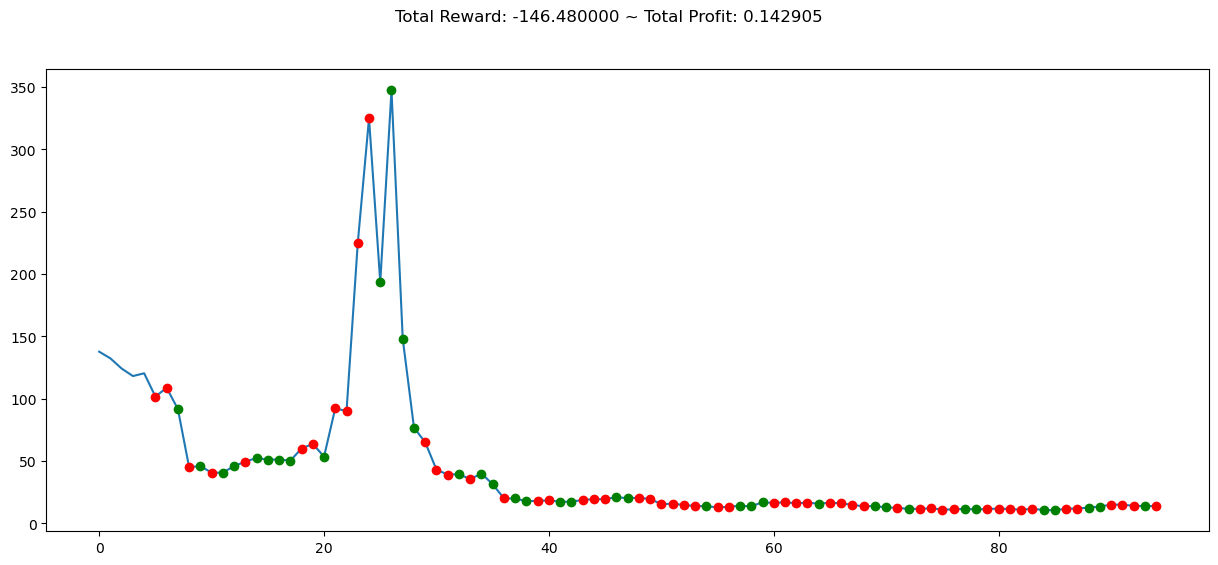

In [12]:
state = env.reset()
while True:
    action = env.action_space.sample()
    n_state, reward, done, info = env.step(action)
    if done:
        print("info", info)
        break
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()

### 3. Build Environment and Train

In [13]:
env_maker = lambda: gym.make('stocks-v0', df=df, frame_bound=(5,100), window_size=5)
env = DummyVecEnv([env_maker])

In [14]:
model = A2C('MlpLstmPolicy', env, verbose=1)
model.learn(total_timesteps=100000)





Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Please use `layer.__call__` method instead.






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor




OMP: Info #254: KMP_AFFINITY: pid 5030 tid 5057 thread 1 bound to OS proc set 1
OMP: Info #254: KMP_AFFINITY: pid 5030 tid 5060 thread 2 bound to OS proc set 0
OMP: Info #254: KMP_AFFINITY: pid 5030 tid 5058 thread 3 bound to OS proc set 1
OMP: Info #254: KMP_AFFINITY: pid 5030 tid 5061 thread 4 bound to OS proc set 0


---------------------------------
| explained_variance | -0.00806 |
| fps                | 2        |
| nupdates           | 1        |
| policy_entropy     | 0.691    |
| total_timesteps    | 5        |
| value_loss         | 21.2     |
---------------------------------
---------------------------------
| explained_variance | 0.00222  |
| fps                | 116      |
| nupdates           | 100      |
| policy_entropy     | 0.691    |
| total_timesteps    | 500      |
| value_loss         | 5.33e+03 |
---------------------------------
---------------------------------
| explained_variance | -0.00193 |
| fps                | 150      |
| nupdates           | 200      |
| policy_entropy     | 0.692    |
| total_timesteps    | 1000     |
| value_loss         | 9.08     |
---------------------------------
---------------------------------
| explained_variance | 0.192    |
| fps                | 172      |
| nupdates           | 300      |
| policy_entropy     | 0.692    |
| total_timest

### 4. Evaluation

In [19]:
env = gym.make('stocks-v0', df=df, frame_bound=(90, 110), window_size=5)
obs = env.reset()
while True:
    obs = obs[np.newaxis, ...]
    action, _states = model.predict(obs)
    obs, rewards, done, info = env.step(action)
    if done:
        print("info", info)
        break

info {'total_reward': 0.0, 'total_profit': 0.7944222506393862, 'position': 1}


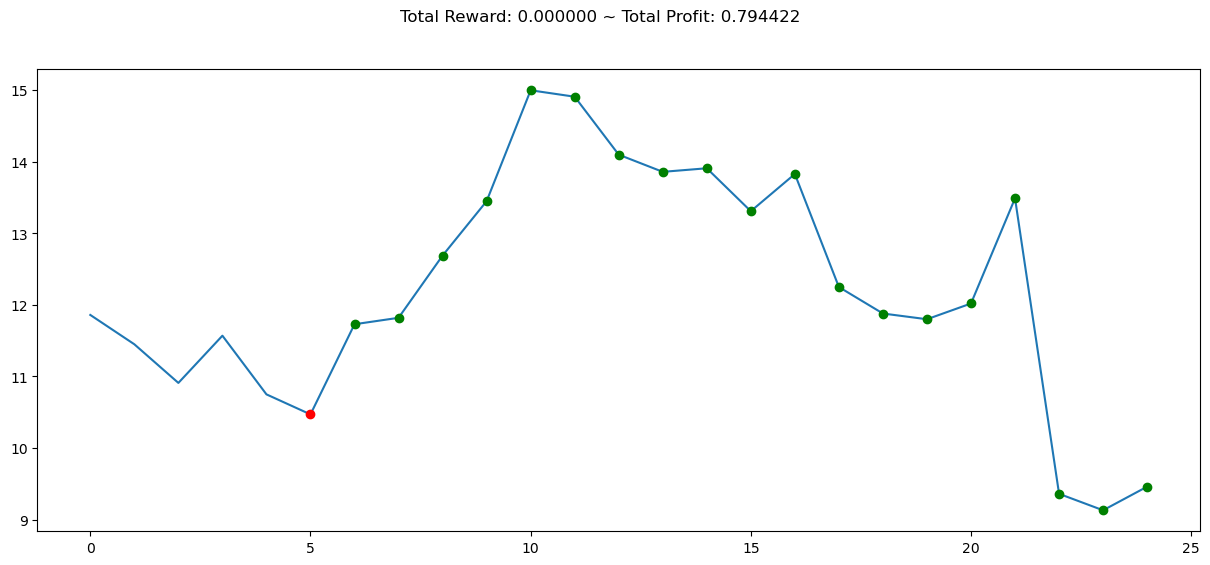

In [20]:
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()